In [ ]:
#mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import os
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#path for the dataset file
path = ("/content/drive/MyDrive/contents/globalterrorismd.csv")
eda_T = pd.read_csv(path,encoding='latin1')

In [ ]:
eda_T.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
eda_T.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
eda_T.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
eda_T.shape

(181691, 135)

In [ ]:
eda_T.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
eda_T.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
eda_T=eda_T[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
eda_T.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [ ]:
eda_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [ ]:
eda_T['Killed'].fillna(eda_T['Killed'].fillna(0), inplace=True)  # Fill with mean
eda_T['Wounded'].fillna(eda_T['Wounded'].fillna(0), inplace=True)

In [ ]:
eda_T

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


In [ ]:
#information of the Countries with most attacks
print("Country with the most attacks:",eda_T['Country'].value_counts().idxmax())
print("Region:",eda_T['Region'].value_counts().idxmax())
print("Year:",eda_T['Year'].value_counts().idxmax())
print("Month:",eda_T['Month'].value_counts().idxmax())
print("Group:",eda_T['Group'].value_counts().index[1])
print("Most Attack Types:",eda_T['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
Region: Middle East & North Africa
Year: 2014
Month: 5
Group: Taliban
Most Attack Types: Bombing/Explosion


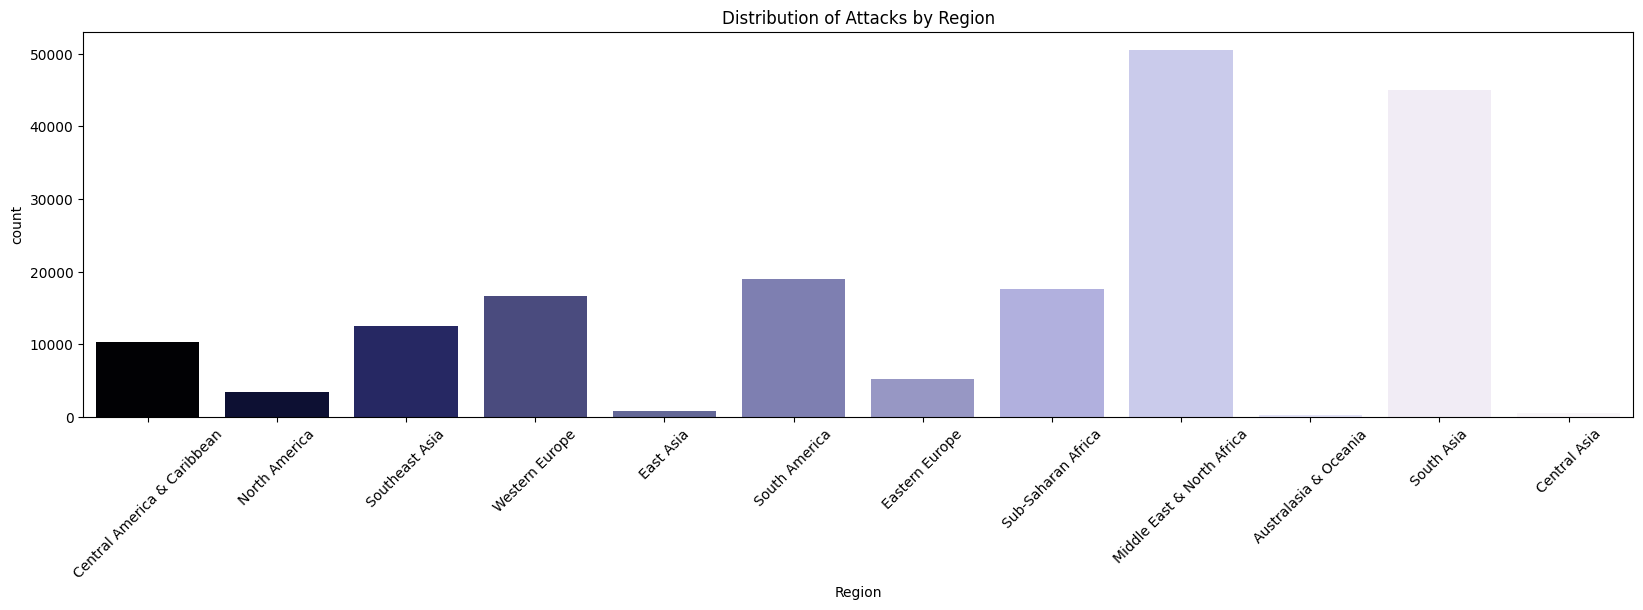

In [ ]:
#Distribution of attacks by region
plt.figure(figsize=(20, 5))
colors_rocket = [
    "#000004", "#070b39", "#1c1e6d", "#414387", "#5a60a0",
    "#7577b9", "#8f8fcc", "#a9a8e6", "#c4c6f1", "#dfdffa",
    "#f1ebf6", "#f9f4f8", "#fbebf5", "#f9dbdb", "#f4bccf",
    "#ec90c7", "#e763bc", "#dd3497", "#d7306e", "#ae0e36"
]
sns.countplot(data=eda_T, x='Region',palette=colors_rocket)
plt.xticks(rotation=45)
plt.title('Distribution of Attacks by Region')
plt.show()

In [ ]:
y_count_years=eda_T['Year'].value_counts().sort_index()
x_year=eda_T['Year'].unique()

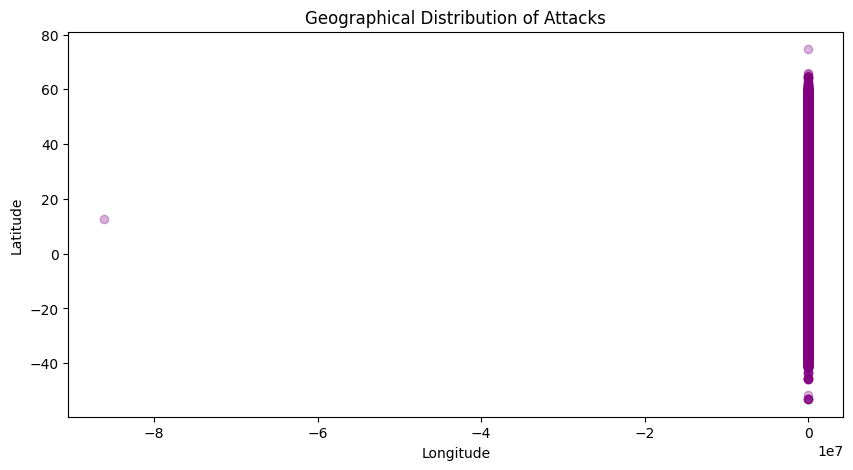

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(eda_T['longitude'], eda_T['latitude'], c='purple', alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Attacks')
plt.show()

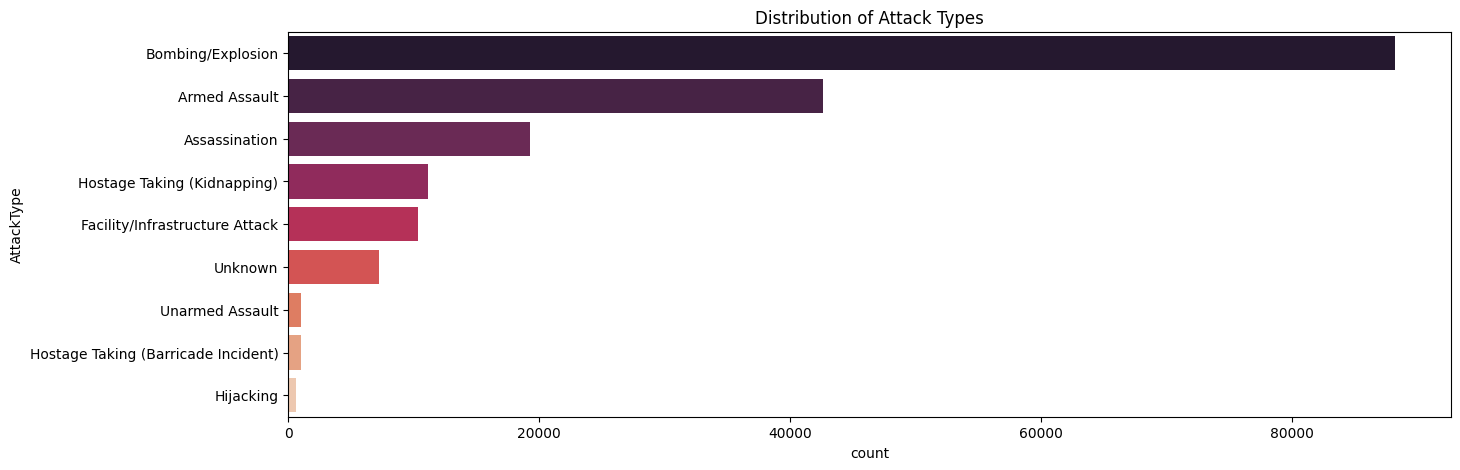

In [ ]:
#chart showing Attack Types
plt.figure(figsize=(15, 5))
sns.countplot(data=eda_T, y='AttackType', order=eda_T['AttackType'].value_counts().index, palette='rocket')
plt.title('Distribution of Attack Types')
plt.show()

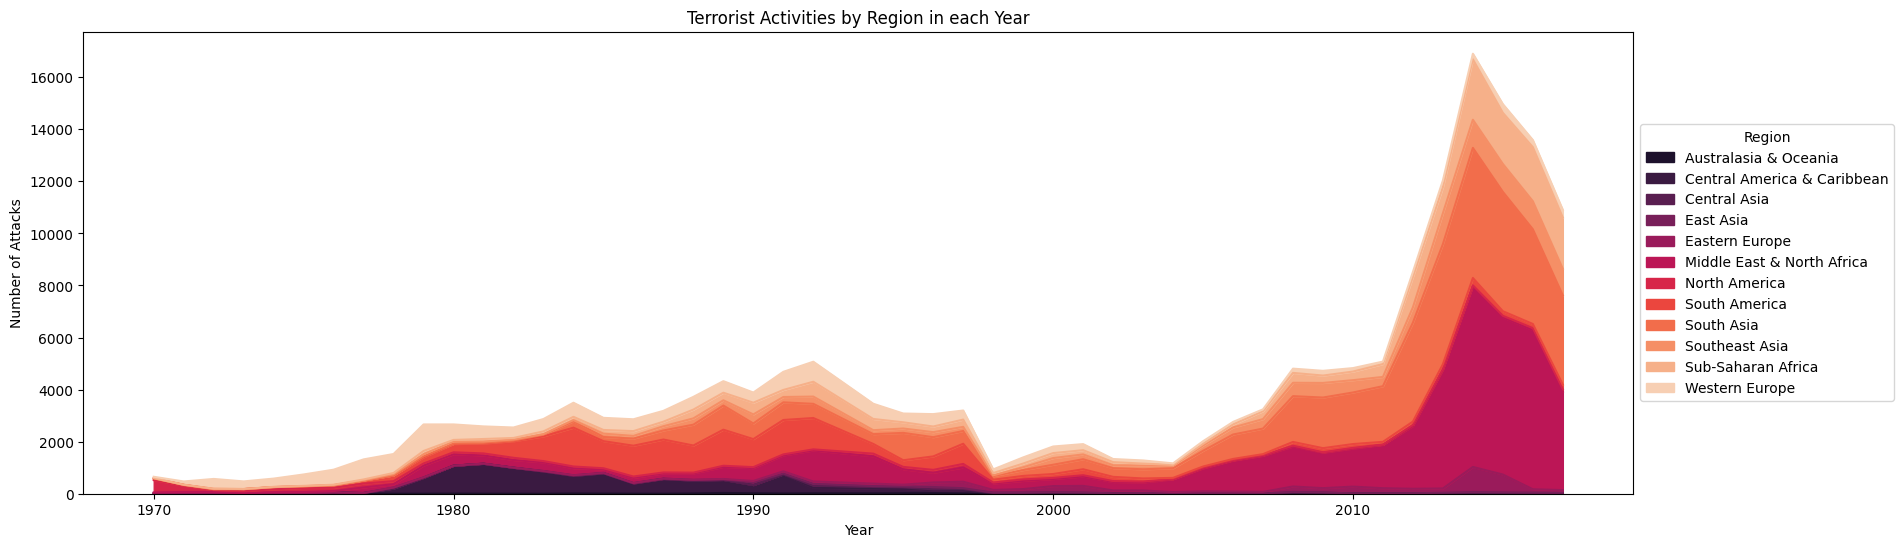

In [ ]:
#chart showing terrorist activites by region in each year
custom_palette = sns.color_palette("rocket", eda_T['Region'].nunique())
custom_colors = custom_palette.as_hex()
ax = pd.crosstab(eda_T.Year, eda_T.Region).plot(kind='area', figsize=(20, 6), color=custom_colors)
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Region', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

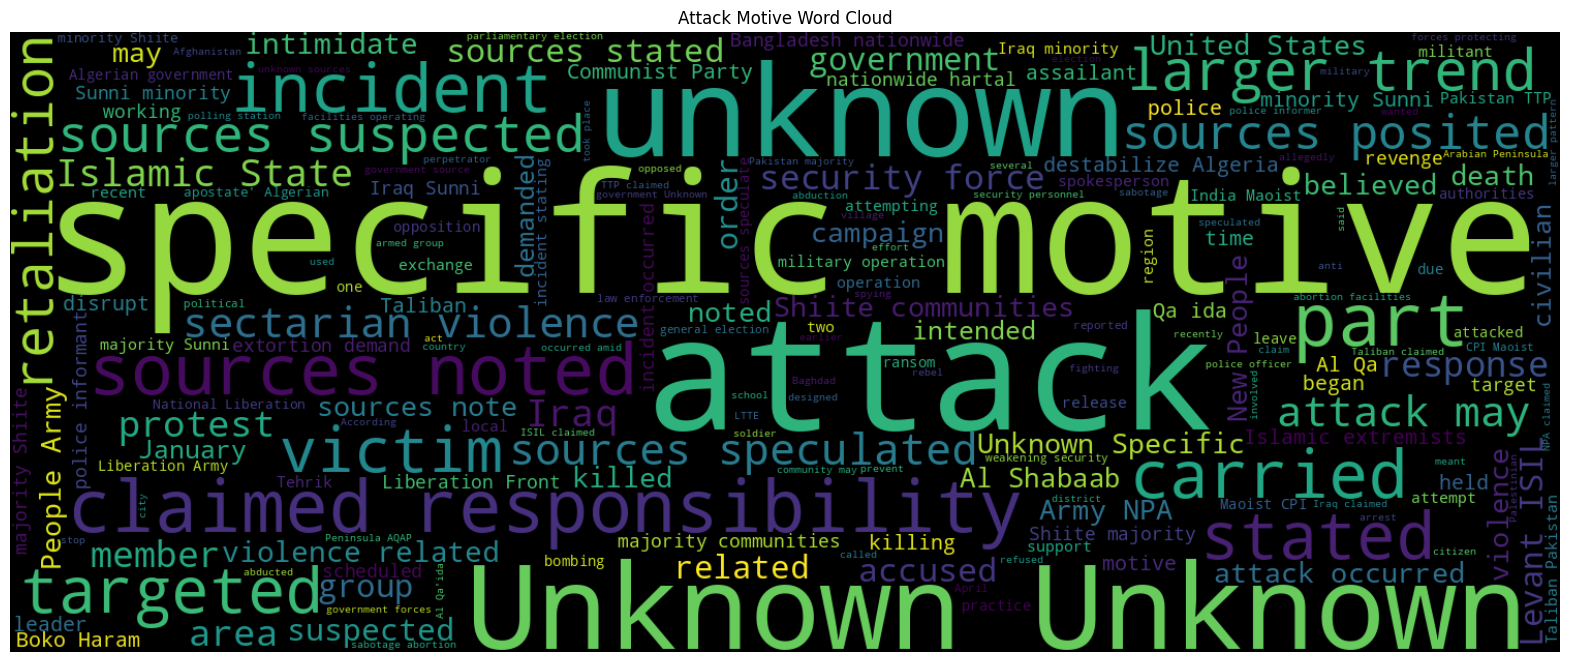

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))
motives_text = ' '.join(eda_T['Motive'].dropna())
wordcloud = WordCloud(width=1500, height=600, background_color='black').generate(motives_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Attack Motive Word Cloud')
plt.show()

In [ ]:
# Regions with Highest Terrorist Attacks
eda_T.Region.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

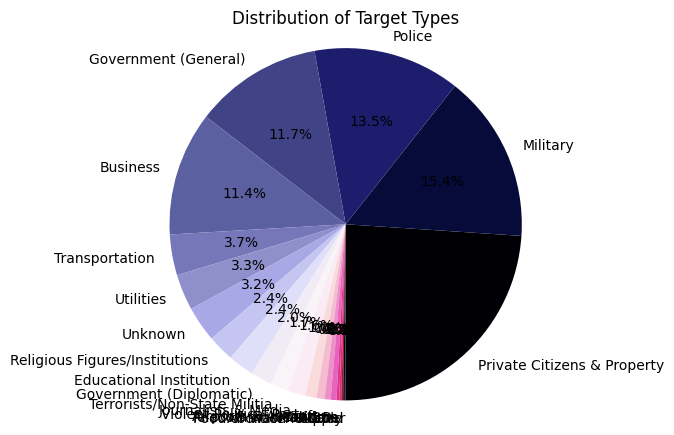

In [ ]:
#Distribution of Target Types
plt.figure(figsize=(5,5))
target_counts = eda_T['Target_type'].value_counts()
colors = [
    "#000004", "#070b39", "#1c1e6d", "#414387", "#5a60a0",
    "#7577b9", "#8f8fcc", "#a9a8e6", "#c4c6f1", "#dfdffa",
    "#f1ebf6", "#f9f4f8", "#fbebf5", "#f9dbdb", "#f4bccf",
    "#ec90c7", "#e763bc", "#dd3497", "#d7306e", "#ae0e36"
]

plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=270, colors=colors)
plt.axis('equal')
plt.title('Distribution of Target Types')
plt.show()

<Figure size 500x400 with 0 Axes>

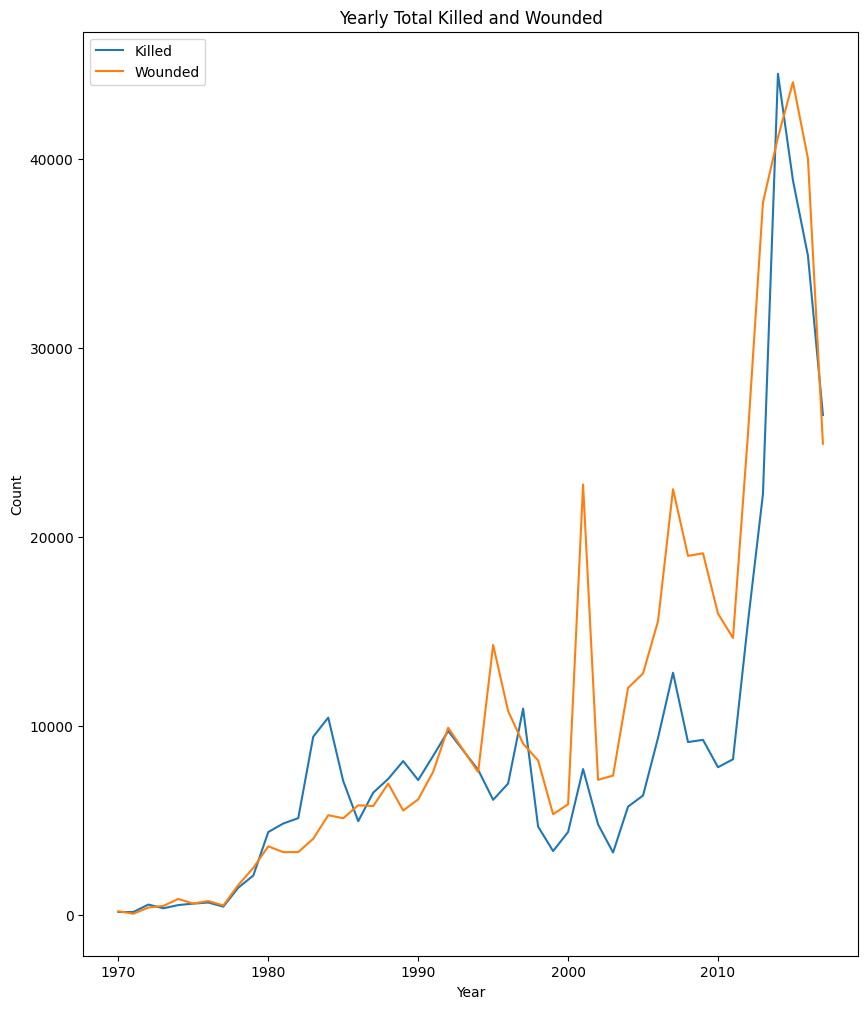

In [ ]:
yearly_casualties = eda_T.groupby('Year')[['Killed', 'Wounded']].sum()
plt.figure(figsize=(5, 4))
yearly_casualties.plot(kind='line')
plt.title('Yearly Total Killed and Wounded')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

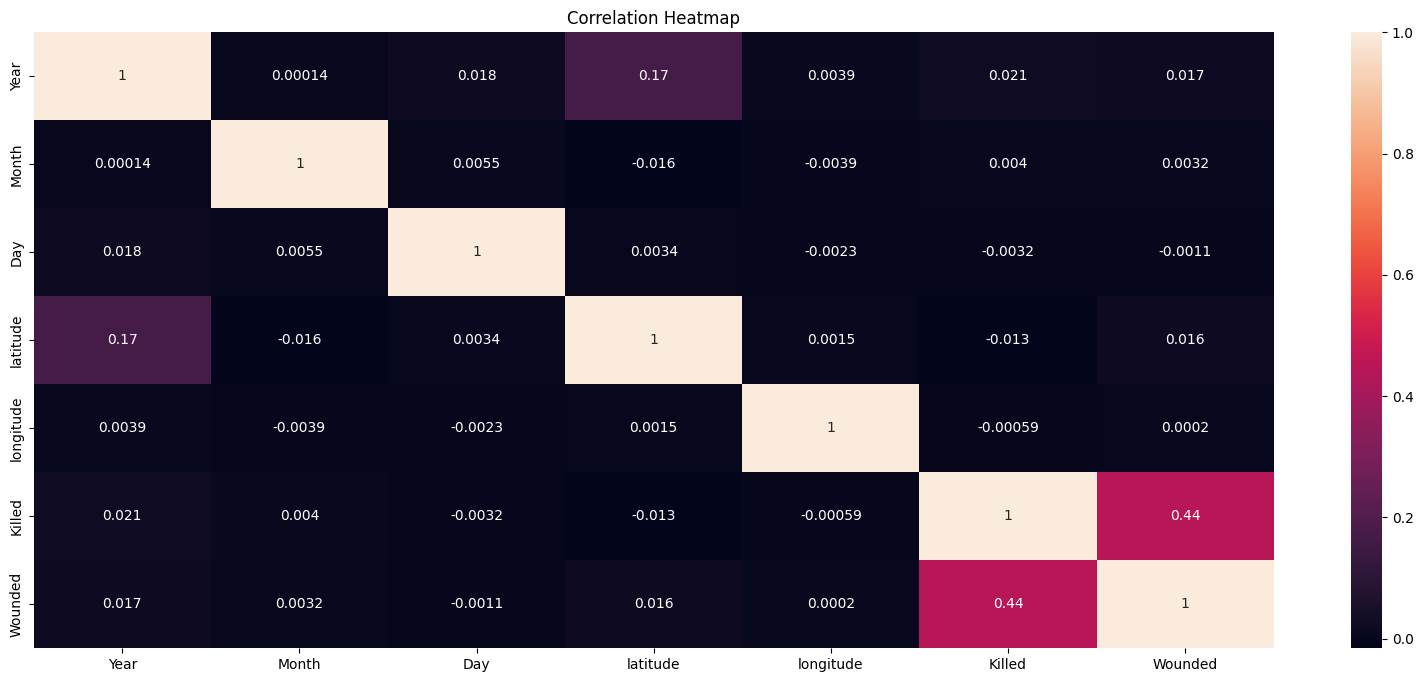

In [ ]:
correlation_matrix = eda_T.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
eda_T.columns

Index(['eventid', 'Year', 'Month', 'Day', 'Country', 'Region', 'AttackType',
       'Target_type', 'Group', 'Weapon_type', 'dbsource'],
      dtype='object')

In [ ]:
# Common types of Terrorist Attacks
eda_T.AttackType.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

In [ ]:
# Most targeted Places for Terrorist Attacks
eda_T.Target_type.value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

In [ ]:
eda_T['K+W']=eda_T['Killed']+eda_T['Wounded']

In [ ]:
dframe=eda_T.sort_values(by='K+W',ascending=False)[:40]
dataf=dframe.pivot_table(index='Country',columns='Year',values='K+W')
dataf.fillna(0,inplace=True)

In [ ]:
dataf

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,536.0,0.000000,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,1161.0,0.0,0.000000,0.0,0.000000,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,520.000000,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1005.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,702.0,0.0,833.333333,0.0,654.0,1064.333333,0.0,911.666667,0.0
Japan,0.0,0.0,0.0,507.0,3092.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Kenya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4224.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


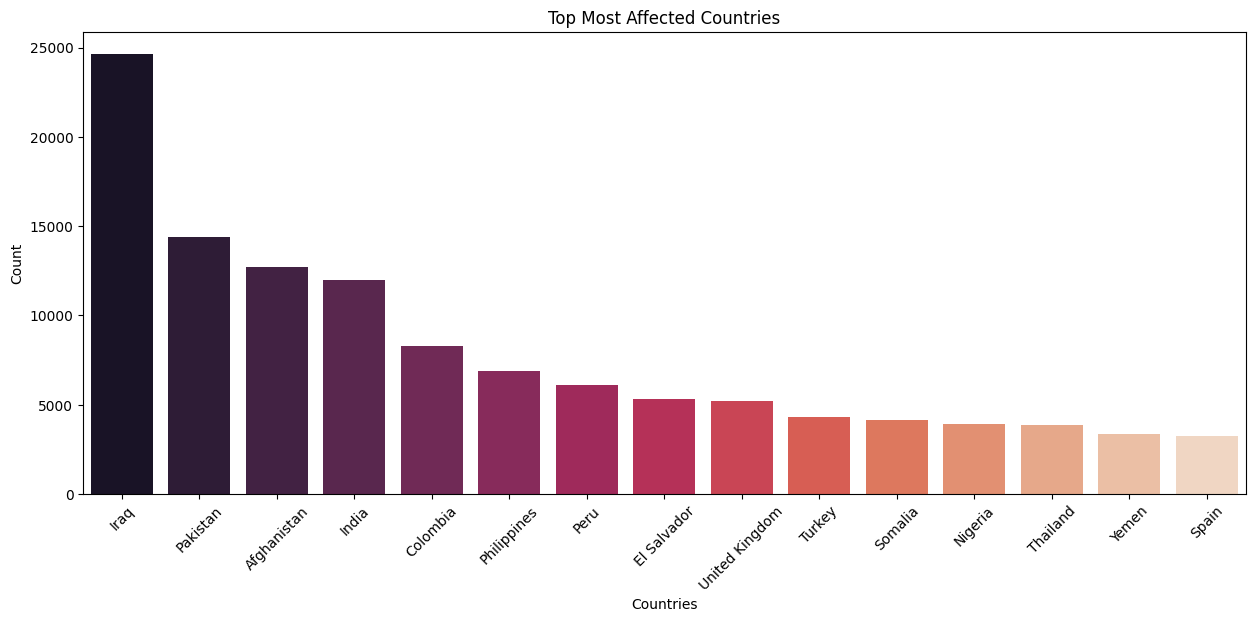

In [ ]:
plt.subplots(figsize=(15, 6))
sns.barplot(x=eda_T['Country'].value_counts()[:15].index,
            y=eda_T['Country'].value_counts()[:15].values,
            palette='rocket')
plt.title('Top Most Affected Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
eda_T.Group.value_counts()[:15]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: Group, dtype: int64

In [ ]:
KD=eda_T.loc[:,'Killed']
print('Total people killed in Attacks:', int(sum(KD)))

Total people killed in Attacks: 411868


In [ ]:
AD=eda_T.loc[:,'AttackType']
AD=pd.concat([AD, KD], axis=1)
AD_Format=AD.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
AD_Format

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [ ]:
CD=eda_T.loc[:,'Country']
CKD=pd.concat([CD, KD], axis=1)
CKD_Format=CKD.pivot_table(columns='Country', values='Killed', aggfunc='sum')
CKD_Format

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


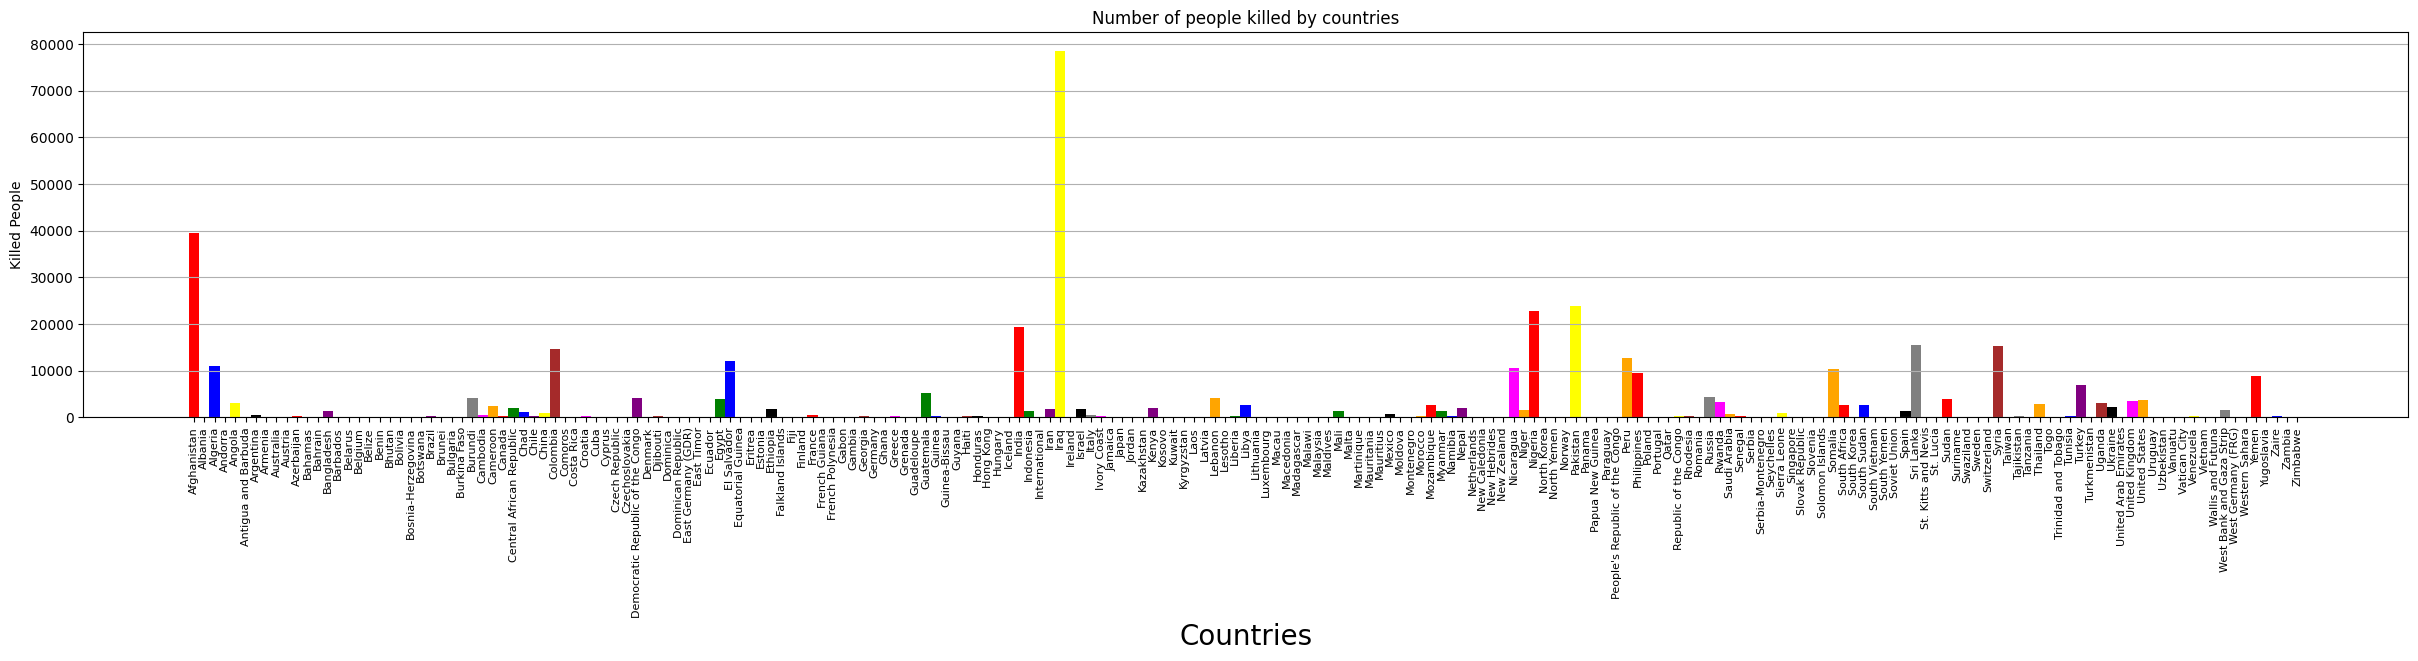

In [ ]:
labels = CKD_Format.columns.tolist()
labels = labels[:206]  # Select the first 206 labels for a nice view
index = range(len(labels))

# Assuming you want to plot the first row of your transposed DataFrame
values = CKD_Format.iloc[0, :].tolist()[:206]
values = [int(i) for i in values]  # Convert float values to integers

colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']  # Color list for bar chart bars

fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color=colors, width=1)
plt.ylabel('Killed People')
plt.xlabel('Countries', fontsize=20)
plt.xticks(index, labels, fontsize=8, rotation=90)
plt.title('Number of people killed by countries')
plt.show()
